In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Import the required libraries first.

In [96]:
data = pd.read_csv('Loan Data.csv')

In [97]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [98]:
data.drop(['Loan_ID'], axis=1, inplace=True)

Drop Loan_ID column as it is useless

In [99]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [102]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [101]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

Handle the missing values in the data frame by replacing null values with the mode of the column

In [103]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
train = data

train = pd.get_dummies(data=train, columns=categorical_cols)
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


Copy original data into new data frame name train, as the original dataframe will be used for visualization, also one hot encode the new dataframe with the help of get_dummies

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train.Loan_Status = le.fit_transform(train.Loan_Status)
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


Now I will label_encode the label, make sure you don't use get_dummies on label as it will divide the label into two seperate columns and you don't want to do that. (Label is another term for the column you want to predict)

In [85]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,0.182410,0.796417,0.346906,0.648208,0.561889,0.166124,0.164495,0.083062,0.781759,0.218241,0.814332,0.133550,0.291531,0.379479,0.328990
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,0.386497,0.402991,0.476373,0.477919,0.496559,0.372495,0.371027,0.276201,0.413389,0.413389,0.389155,0.340446,0.454838,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
corrmatrix = train.corr()
corrmatrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.004710,-0.058809,0.058809,-0.051708,0.051708,-0.092599,0.040861,-0.034650,0.156687,0.140760,-0.140760,-0.127180,0.127180,0.015829,-0.014246,-0.000598
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134,-0.059187,-0.082912,0.082912,-0.075948,0.075948,-0.008292,-0.029769,0.010016,0.041491,0.062290,-0.062290,0.016100,-0.016100,0.005329,-0.027044,0.022776
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.031808,-0.106404,0.106404,-0.146212,0.146212,-0.147542,0.061778,0.020367,0.152619,0.169436,-0.169436,-0.114971,0.114971,0.043570,-0.004730,-0.037259
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.022549,0.074030,-0.074030,0.100912,-0.100912,0.118163,-0.088492,-0.010609,-0.077273,0.073928,-0.073928,0.033739,-0.033739,0.034321,0.059141,-0.094279
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.540556,-0.009170,0.009170,-0.010938,0.010938,0.020500,0.009757,0.007987,-0.060473,0.073658,-0.073658,0.001550,-0.001550,-0.020906,0.035976,-0.016934
Loan_Status,-0.004710,-0.059187,-0.031808,-0.022549,0.540556,1.000000,-0.017987,0.017987,-0.091478,0.091478,-0.003044,-0.038740,0.062384,-0.026123,0.085884,-0.085884,0.003700,-0.003700,-0.100694,0.136540,-0.043621
Gender_Female,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,-0.017987,1.000000,-1.000000,0.364569,-0.364569,0.148421,0.004466,-0.129953,-0.096319,0.045364,-0.045364,-0.000525,0.000525,-0.080283,0.108623,-0.034530
Gender_Male,0.058809,0.082912,0.106404,-0.074030,0.009170,0.017987,-1.000000,1.000000,-0.364569,0.364569,-0.148421,-0.004466,0.129953,0.096319,-0.045364,0.045364,0.000525,-0.000525,0.080283,-0.108623,0.034530
Married_No,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.091478,0.364569,-0.364569,1.000000,-1.000000,0.348175,-0.113853,-0.249547,-0.132566,0.012304,-0.012304,0.004489,-0.004489,0.006805,-0.005845,-0.000546
Married_Yes,0.051708,0.075948,0.146212,-0.100912,0.010938,0.091478,-0.364569,0.364569,-1.000000,1.000000,-0.348175,0.113853,0.249547,0.132566,-0.012304,0.012304,-0.004489,0.004489,-0.006805,0.005845,0.000546


Correlation Matrix to see what columns have what kind of relation with one another

In [120]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049,0.687296,0.182410,0.817590,0.346906,0.653094,0.586319,0.166124,0.164495,0.083062,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990
std,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.463973,0.386497,0.386497,0.476373,0.476373,0.492894,0.372495,0.371027,0.276201,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


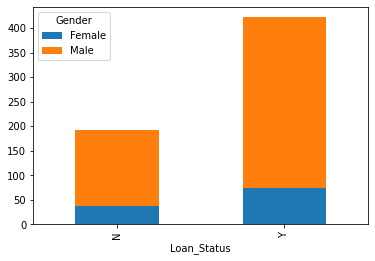

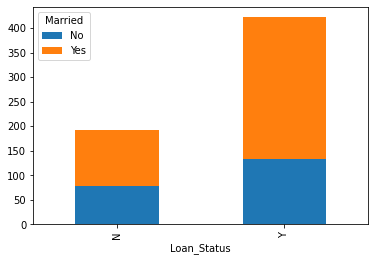

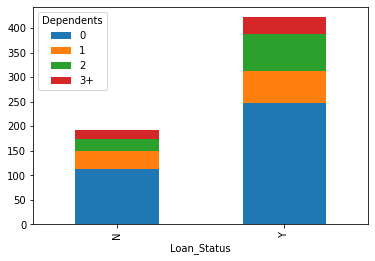

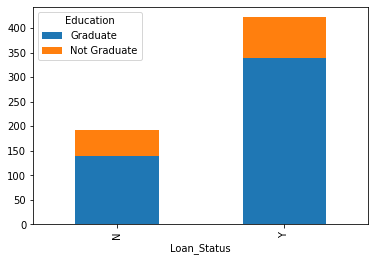

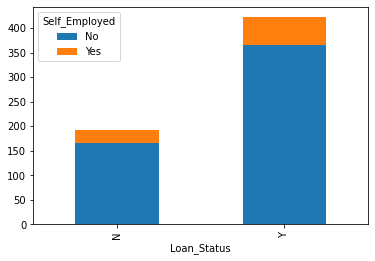

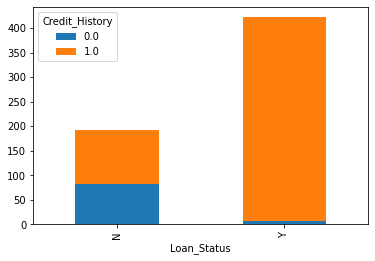

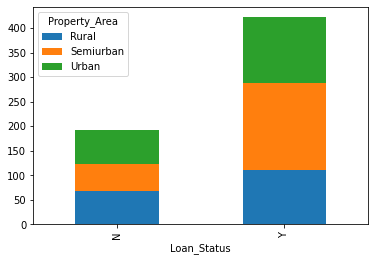

In [117]:
data.groupby(['Loan_Status','Gender']).size().unstack().plot(kind='bar',stacked=True)
data.groupby(['Loan_Status','Married']).size().unstack().plot(kind='bar',stacked=True)
data.groupby(['Loan_Status','Dependents']).size().unstack().plot(kind='bar',stacked=True)
data.groupby(['Loan_Status','Education']).size().unstack().plot(kind='bar',stacked=True)
data.groupby(['Loan_Status','Self_Employed']).size().unstack().plot(kind='bar',stacked=True)
#data.groupby(['Loan_Status','ApplicantIncome']).size().unstack().plot(kind='bar',stacked=True)
#data.groupby(['Loan_Status','CoapplicantIncome']).size().unstack().plot(kind='bar',stacked=True)
#data.groupby(['Loan_Status','LoanAmount']).size().unstack().plot(kind='bar',stacked=True)
#data.groupby(['Loan_Status','Loan_Amount_Term']).size().unstack().plot(kind='bar',stacked=True)
data.groupby(['Loan_Status','Credit_History']).size().unstack().plot(kind='bar',stacked=True)
data.groupby(['Loan_Status','Property_Area']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Create bar plot to analyze data

In [124]:
x= train.drop('Loan_Status', axis = 1)
y= train['Loan_Status']

Dividing the data into x and y vaiables, it will be used for train test split as seen below

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 0)

Applying first model in the form of K-Nearest Neighbors

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [172]:
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)
ypred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[ 4, 29],
       [20, 70]], dtype=int64)

In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.17      0.12      0.14        33
           1       0.71      0.78      0.74        90

    accuracy                           0.60       123
   macro avg       0.44      0.45      0.44       123
weighted avg       0.56      0.60      0.58       123



As you can see, KNN did not perform well enough, the precision was too low and the model was only 60 percent accurate. We can tune the model even further, but let's do that some other time.

Now applying SVC to see how well it performs

In [141]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [143]:
ypredSVC = classifier.predict(x_test)
ypredSVC

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypredSVC))

              precision    recall  f1-score   support

           0       0.84      0.48      0.62        33
           1       0.84      0.97      0.90        90

    accuracy                           0.84       123
   macro avg       0.84      0.73      0.76       123
weighted avg       0.84      0.84      0.82       123



In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypredSVC)

array([[16, 17],
       [ 3, 87]], dtype=int64)

As you can see, SVC performed much better as compared to KNN

Now applying Logistic Regression to see how well it performs

In [168]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
ypredLR = LR.predict(x_test)
ypredLR

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [169]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypredLR)

array([[15, 18],
       [ 7, 83]], dtype=int64)

In [170]:
print(classification_report(y_test, ypredLR))

              precision    recall  f1-score   support

           0       0.68      0.45      0.55        33
           1       0.82      0.92      0.87        90

    accuracy                           0.80       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.78      0.80      0.78       123



Logistic Regression and SVC performed more or less similarly, both are linear models that is why the performance was also the same, KNN on the other hand is not a linear model.